# Lista 4

## 1: Escreva um algoritmo gen´etico simples (SGA) para minimiza¸c˜ao da fun¸c˜ao y(x) = x2 − 0.3 cos (10πx) no intervalo x ∈ [−2, +2], utilizando um gen´otipo de representa¸c˜ao bin´aria com pelo menos 16 bits. Utilizando inicializa¸c˜ao aleat´oria, execute cinco vezes o algoritmo. Comente sobre os resultados obtidos.

In [194]:
# Custo
using Random

function J(x)
    return x^2 - 0.3*cos(10*pi*x);
end

## SGA
# Populacao Inicial

mu = 10
nBits = 16
Xs = BitArray(undef, mu, nBits);
xlim = 2
gens = 1000
k = 3
pm = 0.5
Jmin = -3/10

function bin2num(x, lims)
    power = 1
    total = 0
    for bit in x
        if(bit)
            total += power
        end
        power = 2*power
    end
    max = (2^(length(x)) - 1)
    return lims*(2*total/max - 1)
end

bin2num (generic function with 2 methods)

In [195]:
# Avaliacao

function SGA(Xs, k)
    parents = BitArray(undef, k, nBits)
    Jhist = Array{Float64}(undef, gens)
    scores = Array{Float64}(undef, mu);
    for gen = 1:gens
        
        # Pontuacao  
        for i = 1:mu
            scores[i] = J(bin2num(Xs[i, :], xlim));
        end
        minIdx = argmin(scores)
        Jhist[gen] = scores[minIdx]
        if(abs(Jmin - scores[minIdx]) < 0.001)
            println("Minimo encontrado:");
            return scores[minIdx], bin2num(Xs[minIdx, :], xlim), Jhist
        end
        
        # Selecao dos Pais
        topIdx = sortperm(scores, rev=false)
        copy!(parents, Xs[topIdx[1:k], :])
        
        # Crossover
        for i = 1:mu
            p1 = parents[rand(1:k), :]
            p2 = parents[rand(1:k), :]
            
            for j = 1:nBits
                if rand() > 0.5
                    Xs[i, j] = p1[j]
                else
                    Xs[i, j] = p2[j]
                end
            end
        end
        
        # Mutacao
        for i = 1:mu
            if rand() < pm
                old = Xs[i, rand(1:nBits)]
                Xs[i, rand(1:nBits)] = !old
            end
        end
    end
    # Pontuacao
    minIdx = argmin(scores)
    println("Minimo nao encontrado:");
    return scores[minIdx], bin2num(Xs[minIdx, :], xlim), Jhist
end

SGA (generic function with 2 methods)

In [196]:

allJ = Array{Float64}(undef, gens, 5)

for j = 1:5
    for i = 1:mu
        Xs[i, :] = BitArray(rand() < 0.5 for x in 1:nBits)
    end

    minS, minX, Jhist = SGA(Xs, k);
    println("Min S: ", minS)
    println("Min X: ", minX)
    println("Min S Ideal: ", Jmin)
    println("Min X Ideal: ", 0)
    
    allJ[:, j] = Jhist
end

Minimo encontrado:
Min S: -0.2999265712279818
Min X: -0.0007019150072480329
Min S Ideal: -0.3
Min X Ideal: 0
Minimo nao encontrado:
Min S: -0.14096612718947146
Min X: 0.39645990691996635
Min S Ideal: -0.3
Min X Ideal: 0
Minimo encontrado:
Min S: -0.2999998611876711
Min X: 3.0518043793392735e-5
Min S Ideal: -0.3
Min X Ideal: 0
Minimo nao encontrado:
Min S: 0.05831751877676472
Min X: -0.5917753871976805
Min S Ideal: -0.3
Min X Ideal: 0
Minimo nao encontrado:
Min S: -0.26021575852773643
Min X: -0.19925230792706183
Min S Ideal: -0.3
Min X Ideal: 0


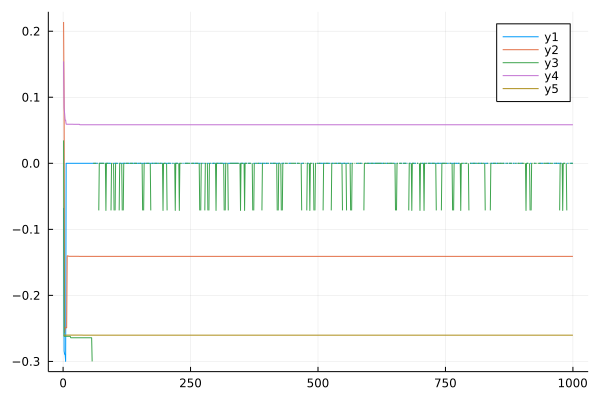

In [197]:
using Plots
plot(allJ)


Comentarios sobre os resultados

# 2. Escreva um algoritmo de estratégia de evolução (ES) para encontrar o ponto ótimo global da função de Ackley com 20 (ou mais) variáveis. Execute o algoritmo muitas vezes (150 execuções com inicialização independente, por exemplo) e guarde o melhor resultado de cada execução. No final, faça um histograma dos 150 valores armazenados.


In [2]:
function ackley(x)
    a = 20
    b = 0.2
    c = 2*pi
    d = length(x)
    return -a*exp(-b*sqrt(1/d*sum(x .^ 2))) - exp(1/d*sum(cos.(c .* x))) + a + exp(1)
end

ackley (generic function with 1 method)

In [16]:
using Plots

x = -20:0.01:20
y = -20:0.01:20
z = []

for i = 1:length(x)
    row = []
    for j = 1:length(y)
        append!(row, ackley([x[i]; y[j]]))
    end
    append!(z, row)
end

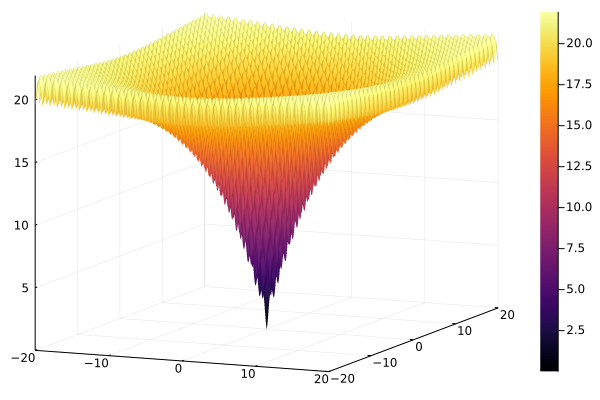

In [17]:
plot(x,y,z,st=:surface)

In [3]:
#ES

function ES(x, gens)
    Jhist = Array{Float64}(undef, gens)
    scores = Array{Float64}(undef, mu);
    scores2 = Array{Float64}(undef, mu+lambda);
#     scores2 = Array{Float64}(undef, lambda);
    parents = Array{Float64}(undef, mu, dims+nSigma)
    descendants = Array{Float64}(undef, lambda, dims+nSigma)
    for gen = 1:gens
        
        # Pontuacao  
        for i = 1:mu
            scores[i] = ackley(x[i, 1:dims]);
        end
        minIdx = argmin(scores)
        Jhist[gen] = scores[minIdx]
        if(abs(Jmin - scores[minIdx]) < 0.001)
            println("Minimo encontrado:");
            return scores[minIdx], x[minIdx, :], Jhist
        end
        
        # Selecao dos Pais
        copy!(parents, x)
        
        # Crossover
        for i = 1:lambda
            p1 = parents[rand(1:mu), :]
            p2 = parents[rand(1:mu), :]
            
            for j = 1:dims
                if rand() > 0.5
                    descendants[i, j] = p1[j]
                else
                    descendants[i, j] = p2[j]
                end
            end
            for j = 1+dims:dims+nSigma
                descendants[i, j] = (p1[j] + p2[j])/2
            end
        end
            
        # Mutacao
        for i = 1:lambda
            n1 = randn()
            for j = 1+dims:dims+nSigma
                descendants[i, j] = descendants[i, j]*exp(tau1*n1)*exp(tau2*randn())
                if(abs(descendants[i, j]) < eps0)
                    descendants[i, j] = eps0*sign(descendants[i, j])
                end
            end
            for j = 1:dims
                descendants[i, j] = descendants[i, j] + descendants[i, j+dims]*randn()
                if(descendants[i, j] > 20)
                    descendants[i, j] = -20
                end
                if(descendants[i, j] < -20)
                    descendants[i, j] = 20
                end
            end
            
        end
        
        # Sobreviventes (Apenas Filhos)
#         for i = 1:lambda
#             scores2[i] = ackley(descendants[i, 1:dims]);
#         end
#         topIdx = sortperm(scores2, rev=false)
#         copy!(x, descendants[topIdx[1:mu], :])
# #         println(x[1, mu+1])
# #         println(scores2)
# #         println(scores2[topIdx[1:mu]])
        
        # Sobreviventes (Pais e Filhos)
        scores2[1:mu] = scores[:]
        for i = mu+1:lambda+mu
            scores2[i] = ackley(descendants[i-mu, 1:dims]);
        end
        candidates = [parents; descendants];
        topIdx = sortperm(scores2, rev=false)
        copy!(x, candidates[topIdx[1:mu], :])
        
    end
    # Pontuacao
    minIdx = argmin(scores)
#     println("Minimo nao encontrado:");
    return scores[minIdx], x[:, minIdx], Jhist
end

ES (generic function with 1 method)

In [9]:
# Primeira Geracao
using Random
using ProgressMeter

runs = 150
gens = 250
dims = 20
mu = 30
lambda = 200
eps0 = 0.01
nSigma = dims
Jmin = 0
tauC = 1
tau1 = tauC/sqrt(2*dims)
tau2 = tauC/sqrt(2*sqrt(dims))
Jmin = 0



allJ = Array{Float64}(undef, gens, runs)
minSList = Array{Float64}(undef, runs)

@showprogress for j = 1:runs
    Random.seed!(j);
    x = rand(mu, dims+nSigma).*40 .- 20
    time = @elapsed begin
        minS, minX, Jhist = ES(x, gens);
#         println("Min S: ", minS)
    #     println("Min X: ", minX)
    #     println("Min S Ideal: ", Jmin)
    #     println("Min X Ideal: ", 0)
        allJ[:, j] = Jhist
        minSList[j] = minS
    end
#     println("Tempo: ", time)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:27


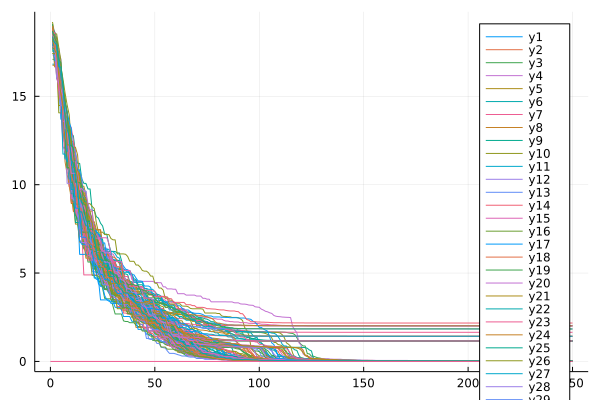

In [10]:
using Plots
plot(allJ)
plot!([0;gens], [0;0])

In [11]:
topIdx = sortperm(minSList, rev=false)
println("10 melhores:")
println(minSList[topIdx[1:10]])

10 melhores:
[0.02216662576269046, 0.022370518380953275, 0.022908577028456723, 0.023159332508694508, 0.02440091679864098, 0.02460557666175278, 0.025024308141919693, 0.025090934715099156, 0.02573835232959043, 0.026019262529335396]


### Histograma com os valores finais

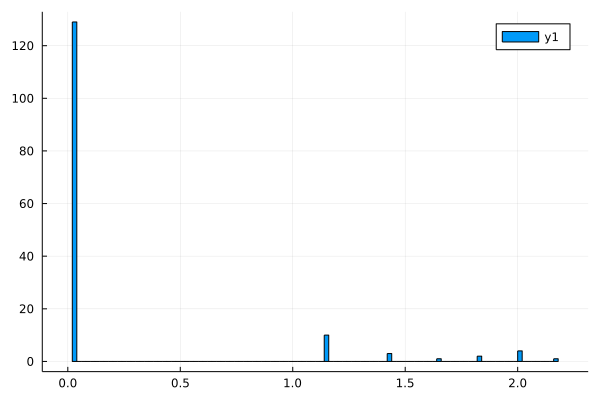

In [12]:
using Plots
histogram(minSList, bins=100)


## 3. Repita o Exercício 2, usando um algorítmo de programação evolucionária (EP).

In [101]:
#EP
function EP(x, gens, mu, q, dims, nSigma, tau1, tau2)
    Jhist = Array{Float64}(undef, gens)
    scores = Array{Float64}(undef, mu)
    scores2 = Array{Float64}(undef, mu+mu)
    wins = zeros(mu+mu)
    descendants = Array{Float64}(undef, mu, dims+nSigma)
    for gen = 1:gens
        
        # Pontuacao  
        for i = 1:mu
            scores[i] = ackley(x[i, 1:dims]);
        end
        minIdx = argmin(scores)
        Jhist[gen] = scores[minIdx]
        if(abs(Jmin - scores[minIdx]) < 0.001)
            println("Minimo encontrado:");
            return scores[minIdx], x[minIdx, :], Jhist
        end
         
        # Mutacao
        copy!(descendants, x)
        for i = 1:mu
            n1 = randn()
            for j = 1+dims:dims+nSigma
                x[i, j] = x[i, j]*exp(tau1*n1)*exp(tau2*randn())
                if(abs(descendants[i, j]) < eps0)
                    descendants[i, j] = eps0*sign(descendants[i, j])
                end
            end
            for j = 1:dims
                descendants[i, j] = descendants[i, j] + descendants[i, j+dims]*randn()
                if(descendants[i, j] > 20)
                    descendants[i, j] = -20
                end
                if(descendants[i, j] < -20)
                    descendants[i, j] = 20
                end
            end
        end        
        
        # Sobreviventes (Pais e Filhos)
        scores2[1:mu] = scores[:]
        for i = mu+1:mu+mu
            scores2[i] = ackley(descendants[i-mu, 1:dims]);
        end
#         println(scores2)
        candidates = [x; descendants];
        
        # Torneio
        wins = wins .* 0
        for i = 1:(2*mu)
            s1 = scores2[i]
            
            for j = 1:q
                sidx = rand(1:(mu*2))
                while sidx == i
                    sidx = rand(1:(mu*2))
                end
                s2 = scores2[sidx]
                if(s1 < s2)
                    wins[i] += 1
                end
            end
        end
#         println(wins)
        
        topIdx = sortperm(wins, rev=true)
        
        copy!(x, candidates[topIdx[1:mu], :])
#         println(x[1:2, 1:2])
#         println()
    end
    # Pontuacao
    minIdx = argmin(scores)
#     println("Minimo nao encontrado:");
    return scores[minIdx], x[:, minIdx], Jhist
end

EP (generic function with 3 methods)

In [116]:
# Primeira Geracao
using Random
using ProgressMeter

runs = 150
gens = 700
dims = 20
q = 10
mu = 30
lambda = 200
eps0 = 0.01
nSigma = dims
Jmin = 0
tauC = 0.5
tau1 = tauC/sqrt(2*dims)
tau2 = tauC/sqrt(2*sqrt(dims))
Jmin = 0

allJ = Array{Float64}(undef, gens, runs)
minSList = Array{Float64}(undef, runs)

@showprogress for j = 1:runs
    Random.seed!(j);
    x = rand(mu, dims+nSigma).*40 .- 20
    minS, minX, Jhist = EP(x, gens, mu, q, dims, nSigma, tau1, tau2);
    allJ[:, j] = Jhist
    minSList[j] = minS
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


In [117]:
using Plots
plot(allJ)
plot!([0;gens], [0;0])

In [118]:
topIdx = sortperm(minSList, rev=false)
println("10 melhores:")
println(minSList[topIdx[1:10]])

10 melhores:
[0.04409263534214647, 0.052576197973789096, 0.10029176310967758, 0.1252901839412286, 1.162948776011849, 1.2305713799757823, 1.435378606820088, 1.553839490156634, 1.6527724273984536, 1.6691939797874977]


### Histograma com os valores finais

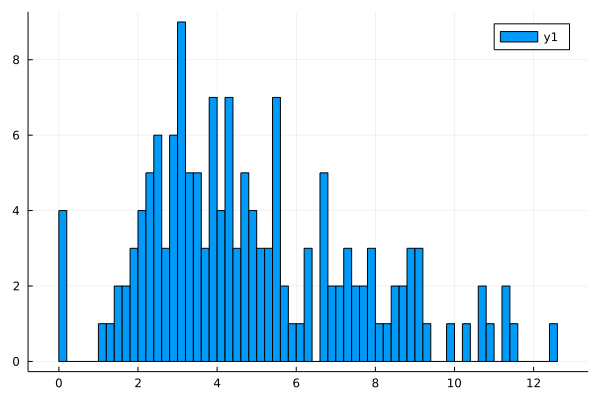

In [119]:
using Plots
histogram(minSList, bins=100)

## 4. Escreva e execute um algoritmo genetico simples (SGA) para resolver um dos tres problemas a seguir:

• Problema de N rainhas, em um tabuleiro de tamanho N por N;

• Problema do caixeiro viajante, com K cidades;

• Problema de “clustering” em M dimens˜oes, com N vetores de dados e K centr´oides

O problema analizado é o caixeiro viajante com 20 cidades dispostas ao longo de uma estrela. O problema é equivalente ao de cidades dispostas ao longo de um circulo, mas com raio variável. Os mínimos continuam sendo os casos em que as cidades seguem ordem crescente ou decrescente.

In [1]:
using Waveforms

const cidades = 20
const raioBase = 0.8506508

const fatorNormalizacao = 1
const raioPentagono = (raioBase .+ 0.2*trianglewave.(10*pi.*(0:cidades-1)./(cidades)) .+ 0.2)
const x = raioPentagono.*[cos.(2 .* pi .* (0:cidades-1) ./ cidades) sin.(2 .* pi .* (0:cidades-1) ./ cidades)];

const ordemOtima = 1:cidades


1:20

In [2]:
using LinearAlgebra

custosTemp = zeros(Float64, cidades, cidades)

for i = 1:cidades
    for j in 1:cidades
        custosTemp[i, j] = norm(x[i, :]-x[j, :])
    end
end

const custos = custosTemp;

In [3]:
function J(ordem)
    distTot = 0.0
    for i = 2:cidades
        distTot += custos[ordem[i], ordem[i-1]]    
    end
    
    distTot += custos[ordem[end], ordem[1]]
    
    return distTot
end

J (generic function with 1 method)

In [4]:
function PMX(p1, p2)
    csize = length(p1)
    child = Array{Int64}(undef, csize) .* 0
    
    #1
    
    i1 = rand(1:csize)
    i2 = rand(1:csize)

    if i1 > i2
        i1, i2 = i2, i1
    end
    
    child[i1:i2] = p1[i1:i2]
    
    #2
    for i = i1:i2
        rep2 = p2[i]
        found = false
        rep_idx2 = findall(p2 .== rep2)[1]
        if(rep2 in child[i1:i2])
            found = true
        end
        while(!found)
            rep1 = p1[rep_idx2]
            rep_idx1 = findall(p1 .== rep1)[1]
            
            if(rep_idx1 < i1 || rep_idx1 > i2)
                child[rep_idx1] = rep2
                found = true
            else
                rep_idx2 = findall(p2 .== rep1)[1]
            end
        end
    end    
    #3
    
    for i = 1:csize
        if child[i] == 0
            child[i] = p2[i]
        end
    end
    
    return child
end

PMX (generic function with 1 method)

In [5]:
function reverse(A, i1, i2)
    max = length(A)
    for i = i1:i2
        A[i] = A[max-i]
    end
end

reverse (generic function with 1 method)

In [28]:
function SGA_cidades(Xs, k, Jmin, mu)
    parents = Array{Int64}(undef, k, cidades)
    Jhist = Array{Float64}(undef, gens)
    scores = Array{Float64}(undef, mu)
    for gen = 1:gens
                
        # Pontuacao  
        for i = 1:mu
            scores[i] = J(Xs[i, :]);
        end
        minIdx = argmin(scores)
        Jhist[gen] = scores[minIdx]
        if(abs(Jmin - scores[minIdx]) < 0.001)
#             println("Minimo encontrado");
            Jhist[gen:end] = Jmin
            return scores[minIdx], Xs[minIdx, :], Jhist
        end
        
        # Selecao dos Pais
        topIdx = sortperm(scores, rev=false)
        copy!(parents, Xs[topIdx[1:k], :])
        
        # Crossover
        for i = 1:mu
            p1 = parents[rand(1:k), :]
            p2 = parents[rand(1:k), :]
            
            Xs[i, :] = PMX(p1, p2)
        end
        
        # Mutacao
        for i = 1:mu
            i1 = rand(1:cidades)
            i2 = rand(1:cidades)
            if i1 > i2
                i1, i2 = i2, i1
            end
            
            Xs[i, i1:i2] = Xs[i, i2:-1:i1]
            
        end
    end
    # Pontuacao
    minIdx = argmin(scores)
#     println("Minimo nao encontrado:");
    return scores[minIdx], Xs[minIdx, :], Jhist
end

SGA_cidades (generic function with 1 method)

In [29]:
using ProgressMeter
using Random

runs = 10
ploting = true
mu = 30
gens = 100
k = 2
Jmin = J(ordemOtima)

allOrdemMin = Array{Int64}(undef, runs, cidades)
allDistancias = ones(gens,runs) * Jmin
allJmin = []

@showprogress for j = 1:runs
    Random.seed!(j);
    
    Xs = Array{Int64}(undef, mu, cidades)
    for i = 1:mu
        Xs[i, :] = shuffle(1:cidades)
    end
     
    time = @elapsed begin
        minS, minX, Jhist = SGA_cidades(Xs, k, Jmin, mu);
        allOrdemMin[j, :] = minX;
        allDistancias[:, j] = Jhist
        push!(allJmin,minS)
    end
end

LoadError: ArgumentError: indexed assignment with a single value to possibly many locations is not supported; perhaps use broadcasting `.=` instead?

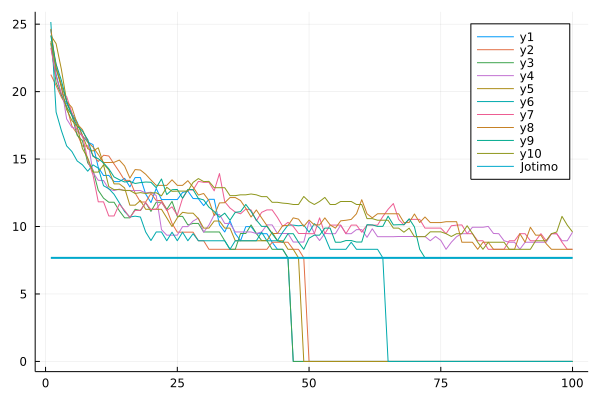

In [27]:
using Measures
using Plots
if ploting
    step = 1
    bestCFG = sortperm(allJmin)[1]
    plot(allDistancias)
#     bDistancias = allDistancias
#     dp = bDistancias[bDistancias .>= Jmin]
#     dp = bDistancias
#     plot(1:step:length(dp), dp[:, 1:step:end], label = "J", lw = 3, size = (800, 400),xtickfontsize=12,ytickfontsize=12, legendfontsize=10,legend=:topleft, margin = 12mm)
    
    plot!(1:step:gens, ones(gens, 1)*Jmin, label = "Jotimo", lw = 2)
end

Jmin: 7.676882573559672
Jotimo: 7.676882573559672

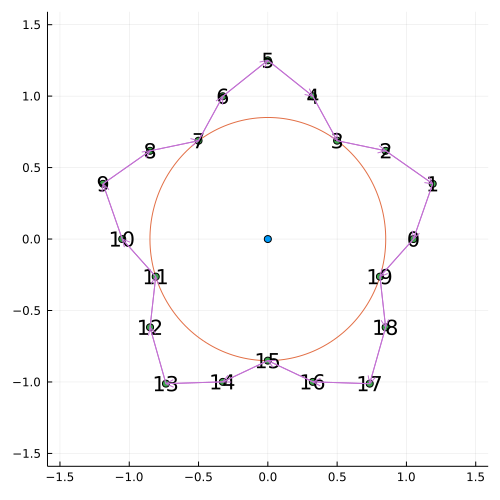

In [9]:
using Plots

if ploting
    
    bOrdem = allOrdemMin[bestCFG, :]
    bestJ = allJmin[bestCFG]

    println("Jmin: ", bestJ)
    println("Jotimo: ", Jmin)
    plot([0], [0], seriestype = :scatter, xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], size = (500, 500), grid = true)
    xt(t) = sin(t)*raioBase
    yt(t) = cos(t)*raioBase
    plot!(xt, yt, 0, 2*pi, leg=false)
    plot!(x[:, 1], x[:, 2], seriestype = :scatter, mode="markers+text", text=0:cidades-1)

    quiver!(x[bOrdem, 1][:],x[bOrdem, 2][:],quiver=(x[[bOrdem[2:end]; bOrdem[1]], 1] - x[bOrdem, 1][:],x[[bOrdem[2:end]; bOrdem[1]], 2] - x[bOrdem, 2][:])) 
end